# Netflix Parte 2





In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [3]:

movies = pd.read_csv('netflix_movies_detailed_up_to_2025.csv')
tv_shows = pd.read_csv('netflix_tv_shows_detailed_up_to_2025.csv')
print("Películas:", movies.shape)
print("Series:", tv_shows.shape)


Películas: (16000, 18)
Series: (16000, 16)


In [4]:
print(movies.info())
print(tv_shows.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [5]:
movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [6]:

tv_shows.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average
0,33238,TV Show,Running Man,안재철,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",South Korea,2010-07-11,2010,8.241,1 Seasons,"Comedy, Reality",ko,A reality and competition show where members a...,1929.898,187,8.241
1,32415,TV Show,Conan,NaN,"Conan O'Brien, Andy Richter",United States of America,2010-11-08,2010,7.035,1 Seasons,"Talk, Comedy, News",en,A late night television talk show hosted by C...,1670.580,229,7.035
2,37757,TV Show,MasterChef Greece,NaN,NaN,Greece,2010-10-03,2010,5.600,1 Seasons,Reality,el,MasterChef Greece is a Greek competitive cooki...,1317.092,6,5.600
3,75685,TV Show,Prostřeno!,NaN,"Václav Vydra, Jana Boušková",Czech Republic,2010-03-01,2010,6.500,1 Seasons,Reality,cs,The knives (and forks) are out as a group of s...,1095.776,6,6.500
4,33847,TV Show,The Talk,NaN,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...","United States of America, Ireland",2010-10-18,2010,3.400,1 Seasons,Talk,en,A panel of well-known news and entertainment p...,712.070,12,3.400


In [7]:

movies['type'] = 'Movie'
tv_shows['type'] = 'TV Show'
combined = pd.concat([movies, tv_shows], ignore_index=True)
print("Combinado:", combined.shape)
combined.head()



Combinado: (32000, 18)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [8]:

combined.to_csv('netflix_dataset_2025.csv', index=False)
print("archivo  nuevo 'netflix_dataset_2025.csv' guardado correctamente.")


archivo  nuevo 'netflix_dataset_2025.csv' guardado correctamente.


In [9]:

netflix_dataset = pd.read_csv('netflix_dataset_2025.csv')
netflix_dataset.shape




(32000, 18)

In [10]:
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [11]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), o

In [12]:
netflix_dataset.isnull().sum()



show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64

In [13]:
num_series = netflix_dataset[netflix_dataset['type'] == 'TV Show'].shape[0]
num_movies = netflix_dataset[netflix_dataset['type'] == 'Movie'].shape[0]
num_titles = netflix_dataset['title'].nunique()
columns = list(netflix_dataset.columns)

print(f"Series: {num_series}")
print(f"Películas: {num_movies}")
print(f"Títulos únicos: {num_titles}")
print(f"Atributos clave: {columns}")

Series: 16000
Películas: 16000
Títulos únicos: 30639
Atributos clave: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'language', 'description', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue']


In [14]:

netflix_dataset['description'] = netflix_dataset['description'].replace('', np.nan)
netflix_dataset = netflix_dataset.dropna(subset=['description']).reset_index(drop=True)
print("Dimensiones después de limpiar:", netflix_dataset.shape)

Dimensiones después de limpiar: (28662, 18)


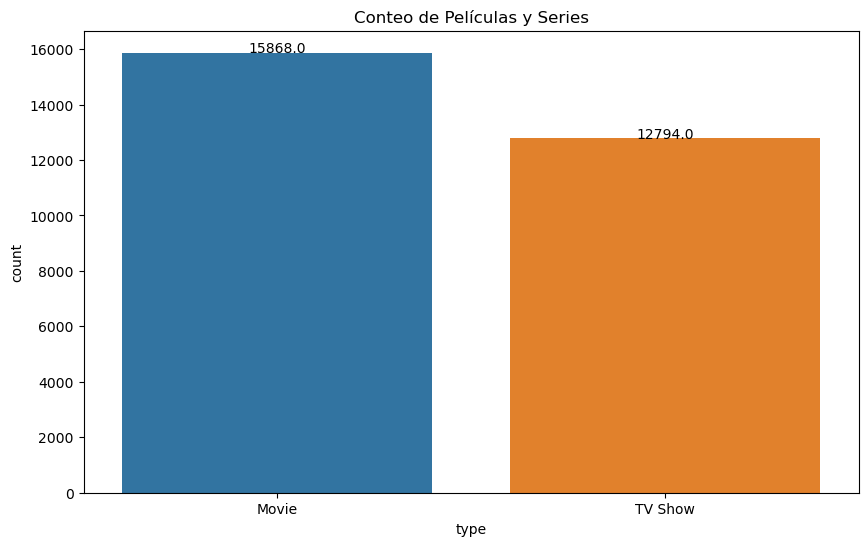

In [15]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='type', data=netflix_dataset)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')
plt.title('Conteo de Películas y Series')
plt.show()




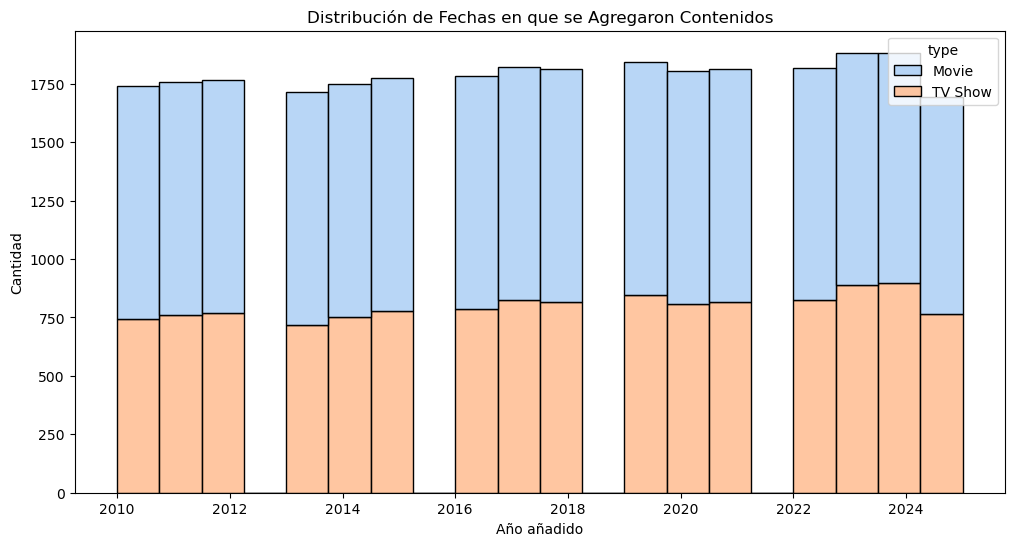

In [41]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer un estilo de color pastel
sns.set_palette("pastel")

# Datos para la gráfica
netflix_dataset['date_added'] = pd.to_datetime(netflix_dataset['date_added'], errors='coerce')
netflix_dataset['year_added'] = netflix_dataset['date_added'].dt.year

# Crear la gráfica
plt.figure(figsize=(12,6))
sns.histplot(data=netflix_dataset, x='year_added', hue='type', multiple='stack', bins=20)
plt.title('Distribución de Fechas en que se Agregaron Contenidos')
plt.xlabel('Año añadido')
plt.ylabel('Cantidad')
plt.show()


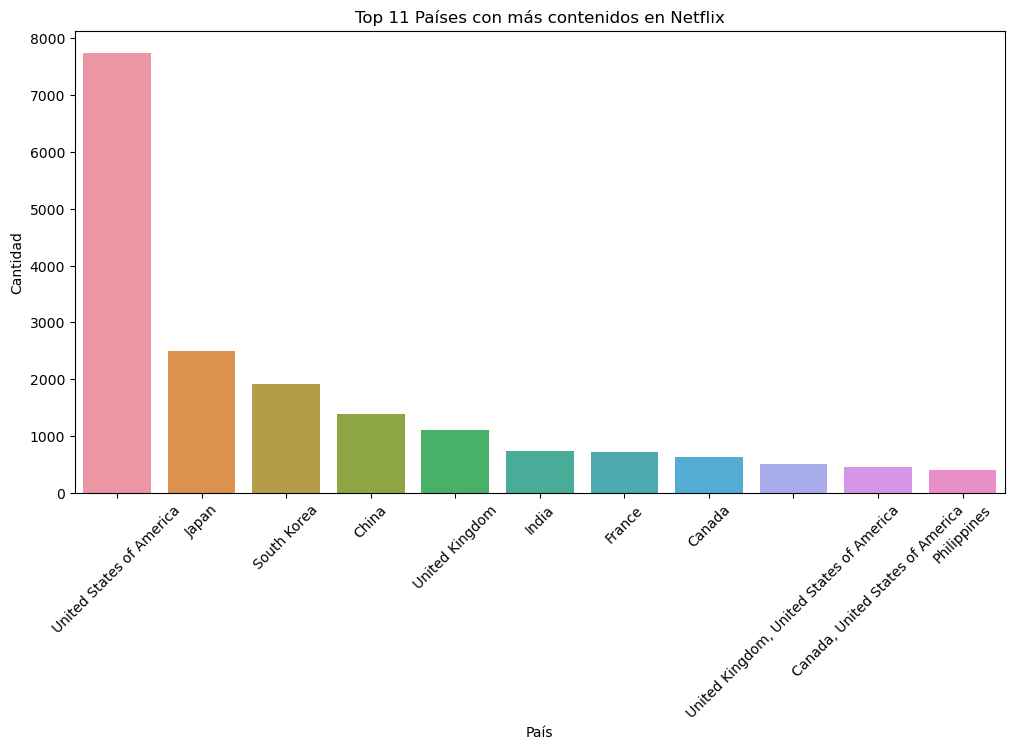

In [17]:

top_countries = netflix_dataset['country'].value_counts().dropna().head(11)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 11 Países con más contenidos en Netflix')
plt.ylabel('Cantidad')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()


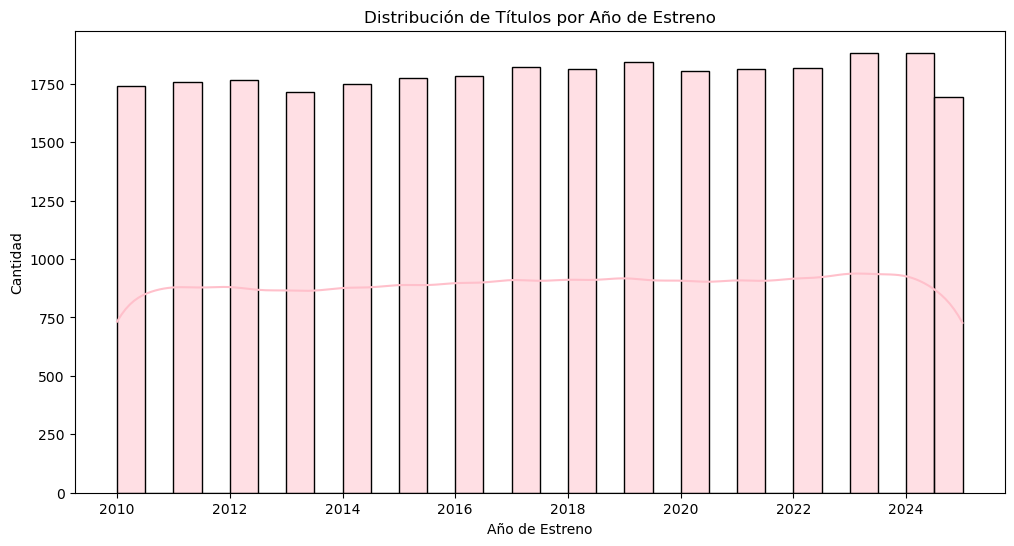

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(data=netflix_dataset, x='release_year', bins=30, kde=True, color="pink")
plt.title('Distribución de Títulos por Año de Estreno')
plt.xlabel('Año de Estreno')
plt.ylabel('Cantidad')
plt.show()


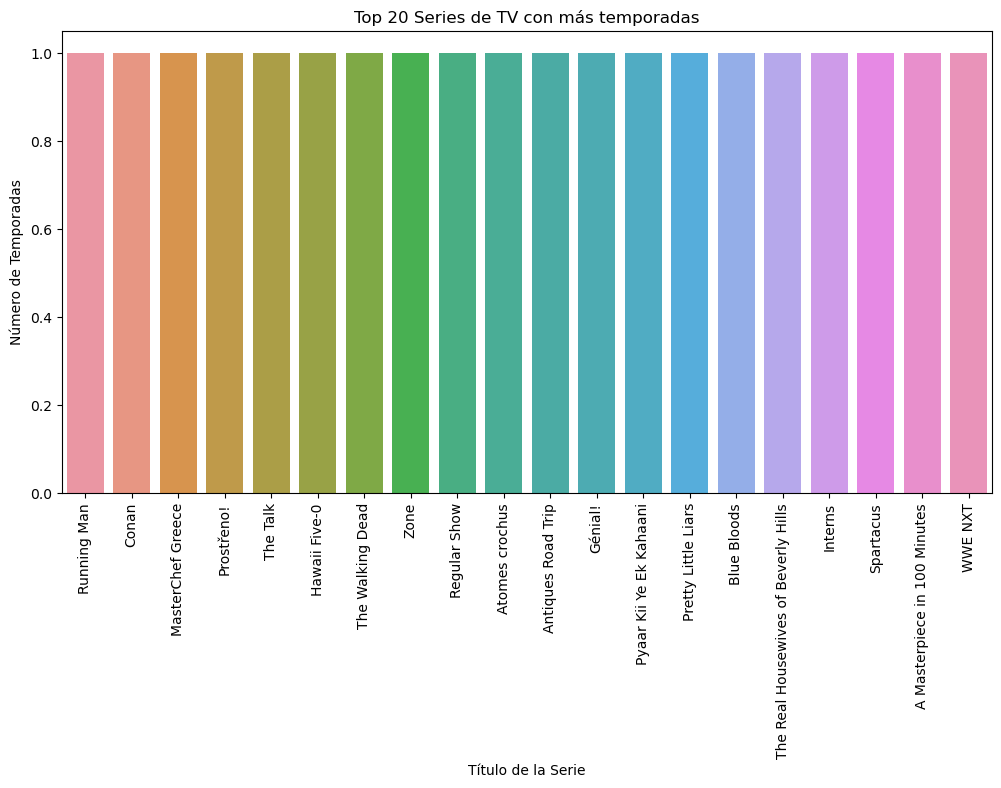

In [19]:
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()
netflix_shows['duration'] = netflix_shows['duration'].str.replace(' Seasons','', regex=False)
netflix_shows['duration'] = netflix_shows['duration'].str.replace(' Season','', regex=False)
netflix_shows['duration'] = netflix_shows['duration'].fillna('0').astype(int)
top20_seasons = netflix_shows.nlargest(20, 'duration')
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='duration', data=top20_seasons)
plt.xticks(rotation=90)
plt.title('Top 20 Series de TV con más temporadas')
plt.xlabel('Título de la Serie')
plt.ylabel('Número de Temporadas')
plt.show()

In [21]:

tfidf = TfidfVectorizer(stop_words='english')
netflix_dataset['description'] = netflix_dataset['description'].replace('', np.nan)
netflix_dataset = netflix_dataset.dropna(subset=['description']).reset_index(drop=True)
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
tfidf_matrix.shape

(28662, 54565)

In [22]:
print(tfidf_matrix[:5])
print(tfidf_matrix[-5:])


  (0, 28356)	0.07719158557063792
  (0, 49448)	0.10340836665029506
  (0, 39162)	0.16755412275706366
  (0, 52873)	0.07454422657472484
  (0, 40105)	0.1599585773214069
  (0, 43008)	0.12501961356806074
  (0, 30585)	0.13578747172829184
  (0, 16973)	0.20657576146840817
  (0, 22174)	0.16376708844010202
  (0, 34160)	0.22717740562948982
  (0, 26068)	0.12307953842436788
  (0, 4025)	0.11487318353020787
  (0, 16398)	0.2570294076363639
  (0, 51227)	0.14120859804191713
  (0, 49772)	0.16023062809735614
  (0, 42847)	0.13075044703100597
  (0, 14175)	0.22717740562948982
  (0, 34158)	0.22288699104847765
  (0, 39005)	0.11032536824202238
  (0, 27823)	0.10420445542090301
  (0, 16623)	0.15200205998146318
  (0, 41203)	0.464856897386944
  (0, 29027)	0.18581126454647073
  (0, 11867)	0.13339543221105982
  (0, 35060)	0.2487396782735415
  :	:
  (4, 23453)	0.1318989949854845
  (4, 28218)	0.1438806567647162
  (4, 39022)	0.126772358013753
  (4, 16574)	0.16745223842235624
  (4, 13799)	0.21743536383798814
  (4, 30645)	0

In [24]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

In [27]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_dataset['title'].iloc[movie_indices]

In [35]:
get_recommendations('Avengers: Infinity War')





8980                                     Avengers: Endgame
7397     LEGO Marvel Super Heroes: Guardians of the Gal...
18234                                    Marvel's Avengers
14251             LEGO Marvel Avengers: Mission Demolition
8942                             Avengers Grimm: Time Wars
13335                       LEGO Marvel Avengers: Code Red
19355                       Marvel Disk Wars: The Avengers
23454                                              Pandora
3362                      Phineas and Ferb: Mission Marvel
15982               The Avengers: Earth's Mightiest Heroes
Name: title, dtype: object

In [36]:
get_recommendations('Dil Dhadakne Do')




3559                                  Le Week-End
6445                              The Family Fang
8728                   There's No Place Like Home
5750                             One Crazy Cruise
3858                                Family United
8654                         What Keeps You Alive
13914    My Brother-in-law Is Looking For Me Only
9262                    My Sister-in-law's Secret
22784                         Frankenstein Family
19666                               Iron Lady Cha
Name: title, dtype: object

In [38]:
get_recommendations('The Letter for the King')



1252                        Your Highness
3211     Justin and the Knights of Valour
9029                                 1917
3330                              Phantom
10978                    The Tomorrow War
950            Tales of an Ancient Empire
11130                                Vivo
10020                              Onward
26487                           Shahmaran
11314                       The Banishing
Name: title, dtype: object

In [39]:
get_recommendations('Criminal Minds')



24162                                        Disappeared
17560    The High Fructose Adventures of Annoying Orange
25735                                     Die Beschatter
8836                                Dark Figure of Crime
21374                                   Police in action
8239       The Testament of Sister New Devil: Departures
17211                              Detectives in Trouble
19131                                            Balabol
26533                                 The Evidence Tells
21413                                    Cold Case Files
Name: title, dtype: object